# Pull git

In [ ]:
%rm -rf /content/vinbrain-internship
!git clone -b w3-task1 "https://github.com/huyentls1114/vinbrain-internship.git"
%cd /content/vinbrain-internship
!git pull 
%cd classifier/

In [ ]:
!unzip '/content/drive/MyDrive/vinbrain_internship/data/MenWoman.zip' -d '/content/data'

# data

In [3]:
import config.configs_colabs as configs

In [4]:
configs.output_folder

'/content/drive/MyDrive/vinbrain_internship/model/menWoman_vgg16_adam_1e-4'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class woman woman woman woman men men woman men men men men woman woman men woman men woman men woman woman woman woman woman men woman woman woman woman men woman woman men woman woman men men men men woman men men men woman woman men men men woman woman men woman woman men woman men woman men woman men woman men men men woman


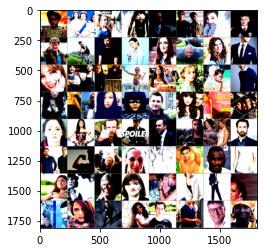

In [5]:
from data.data import CIFARData
data = CIFARData(configs)
data.show_batch("train")

# Train


In [ ]:
from train.train import Trainer
trainer = Trainer(configs, data)
trainer.train()

# Test

In [6]:
from train.train import Trainer
trainer = Trainer(configs, data)
trainer.load_checkpoint("checkpoint_12")
trainer.evaluate("test")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


(tensor(0.3203, device='cuda:0'), tensor(0.9339, device='cuda:0'))

In [11]:
from utils.metric import Precision, Recall, F1_Score, Fbeta_Score
trainer.evaluate("test", Precision(2))

(tensor(0.3203, device='cuda:0'), tensor([0.9306, 0.9365], device='cuda:0'))

# Test model

In [ ]:
from train.train import Trainer
trainer = Trainer(configs, data)
# trainer.train()
trainer.output_folder

'/content/drive/MyDrive/vinbrain_internship/model/menWoman_densenet121_adam_1e-4'

In [ ]:
trainer.train()

In [ ]:
trainer.load_checkpoint("checkpoint_12")
trainer.evaluate("test")

(tensor(0.2037, device='cuda:0'), tensor(0.9550, device='cuda:0'))

In [ ]:
from torchvision.models import densenet121
from model.CNN import TransferNet
configs.output_folder = '/content/drive/MyDrive/vinbrain_internship/model/menWoman_densenet121_adam_1e-4'
configs.net = {
    "class": TransferNet,
    "net_args":{
        "model_base": densenet121,
        "fc_channels":[1024*7*7, 1024],
        "pretrain": True,
        "num_classes":2
    }
}
from train.train import Trainer
trainer = Trainer(configs, data)


In [ ]:
import glob
from skimage import io
list_img_name = glob.glob("/content/data/men/*12.jpg")
list_imgs = []
for img_name in list_img_name:
    img = io.imread(img_name)
    list_imgs.append(img)
trainer.get_prediction(list_imgs)

tensor([[  2.9795,  -3.1904],
        [  3.3733,  -3.4439],
        [ 13.6825, -12.8188],
        [  5.3073,  -5.2218],
        [  9.4152,  -7.5999],
        [  7.9756,  -7.7390],
        [  1.0291,  -0.5943],
        [ -3.5248,   3.4715],
        [  9.3290,  -8.7865],
        [  4.0737,  -3.2520],
        [  7.1331,  -6.4996],
        [  6.3099,  -5.8306],
        [  1.7863,  -1.6571],
        [  2.6199,  -2.4733]], device='cuda:0')

In [ ]:
from utils.metric import Precision, Recall, F1_Score, Fbeta_Score
trainer.evaluate("test", Precision())

RuntimeError: ignored

# Test optimization 

In [ ]:
import config.configs_colabs as configs
from train.train import Trainer

In [ ]:
from torch.optim import RMSprop
configs.lr = 0.001
configs.optimizer={
    "class":RMSprop,
    "optimizer_args":{
    }
}
trainer = Trainer(configs, data)
trainer.train("loss_file_RMSProp.txt")

NameError: ignored

In [ ]:
from torch.optim import Adam
configs.lr = 0.001
configs.optimizer={
    "class":Adam,
    "optimizer_args":{
    }
}
trainer = Trainer(configs, data)
trainer.train("file_loss_Adam.txt")

Epoch 0 step 0
	Loss average 0.001150
	Loss valid average 2.305992, acc valid 0.101400
learning_rate  0.001
Epoch 0 step 1999
	Loss average 1.619367
	Loss valid average 1.429725, acc valid 0.480333
learning_rate  0.001
Epoch 1 step 0
	Loss average 0.000683
	Loss valid average 1.394577, acc valid 0.496867
learning_rate  0.001
Epoch 1 step 1999
	Loss average 1.339609
	Loss valid average 1.347215, acc valid 0.509333
learning_rate  0.001
Epoch 2 step 0
	Loss average 0.000618
	Loss valid average 1.312550, acc valid 0.528133
learning_rate  0.001
Epoch 2 step 1999
	Loss average 1.226920
	Loss valid average 1.256063, acc valid 0.548800
learning_rate  0.001
Epoch 3 step 0
	Loss average 0.000639
	Loss valid average 1.258436, acc valid 0.550000
learning_rate  0.001
Epoch 3 step 1999
	Loss average 1.144583
	Loss valid average 1.229436, acc valid 0.560533
learning_rate  0.001
Epoch 4 step 0
	Loss average 0.000419
	Loss valid average 1.201853, acc valid 0.575333
learning_rate  0.001
Epoch 4 step 199

In [ ]:
from model.optimizer import RAdam
configs.lr = 0.001
configs.optimizer={
    "class":RAdam,
    "optimizer_args":{
    }
}
trainer = Trainer(configs, data)
trainer.train("file_loss_RAdam.txt")

Epoch 0 step 0
	Loss average 0.001159


/content/vinbrain-internship/classifier/model/optimizer.py:60: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


	Loss valid average 2.305863, acc valid 0.073667
learning_rate  0.001
Epoch 0 step 1999
	Loss average 1.715587
	Loss valid average 1.488591, acc valid 0.465733
learning_rate  0.001
Epoch 1 step 0
	Loss average 0.000587
	Loss valid average 1.493251, acc valid 0.452000
learning_rate  0.001
Epoch 1 step 1999
	Loss average 1.366262
	Loss valid average 1.334285, acc valid 0.528333
learning_rate  0.001
Epoch 2 step 0
	Loss average 0.000527
	Loss valid average 1.263068, acc valid 0.550533
learning_rate  0.001
Epoch 2 step 1999
	Loss average 1.205972
	Loss valid average 1.226185, acc valid 0.563467
learning_rate  0.001
Epoch 3 step 0
	Loss average 0.000284
	Loss valid average 1.213522, acc valid 0.571067
learning_rate  0.001
Epoch 3 step 1999
	Loss average 1.098516
	Loss valid average 1.164884, acc valid 0.590467
learning_rate  0.001
Epoch 4 step 0
	Loss average 0.000803
	Loss valid average 1.174908, acc valid 0.579667
learning_rate  0.001
Epoch 4 step 1999
	Loss average 1.023373
	Loss valid a

# test lr scheduler

In [ ]:
from train.train import Trainer
# trainer = Trainer(configs, data)

In [ ]:
trainer.train()

In [ ]:
#MultistepLR
from torch.optim.lr_scheduler import MultiStepLR
configs.num_epochs = 20
configs.lr_schedule ={
    "class": MultiStepLR,
    "metric":None,
    "step_type":"epoch",
    "schedule_args":{
        "milestones":[10, 15],
        "gamma":0.1,
    }
}
trainer = Trainer(configs, data)
trainer.train(loss_file = "loss_file_multisteplr.txt")

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
configs.num_epochs = 30
configs.lr_schedule={
    "class":ReduceLROnPlateau,
    "metric":"val_loss",
    "step_type":"epoch",
    "schedule_args":{
        "mode":"min",
        "factor":0.1,
        "patience":4,
        "threshold":1e-2,
        "min_lr":1e-4
    }
}
trainer = Trainer(configs, data)
trainer.train("loss_file_ReduceLROnPlateau.txt")

Epoch 0 step 0
	Loss average 0.001151
	Loss valid average 2.304968, acc valid 0.098800
Epoch 0 step 1999
	Loss average 1.776647
	Loss valid average 1.645739, acc valid 0.401333
learning_rate  0.01
Epoch 1 step 0
	Loss average 0.000975
	Loss valid average 1.685565, acc valid 0.402800
Epoch 1 step 1999
	Loss average 1.521833
	Loss valid average 1.451632, acc valid 0.479200
learning_rate  0.01
Epoch 2 step 0
	Loss average 0.000669
	Loss valid average 1.547229, acc valid 0.450267
Epoch 2 step 1999
	Loss average 1.456243
	Loss valid average 1.459238, acc valid 0.483400
learning_rate  0.01
Epoch 3 step 0
	Loss average 0.000684
	Loss valid average 1.549178, acc valid 0.447600
Epoch 3 step 1999
	Loss average 1.404972
	Loss valid average 1.501563, acc valid 0.483667
learning_rate  0.01
Epoch 4 step 0
	Loss average 0.000660
	Loss valid average 1.508439, acc valid 0.462067
Epoch 4 step 1999
	Loss average 1.364757
	Loss valid average 1.414794, acc valid 0.510733
learning_rate  0.01
Epoch 5 step 0


In [ ]:
from torch.optim.lr_scheduler import OneCycleLR
configs.num_epochs = 30
configs.lr_schedule = {
    "class":OneCycleLR,
    "metric": None,
    "step_type":"batch",
    "schedule_args":{
        "max_lr":0.01,
        "epochs":configs.num_epochs,
        "steps_per_epoch":configs.steps_per_epoch+1
    }    
}
trainer = Trainer(configs, data)
trainer.train(loss_file = "loss_file_OneCycleLR.txt")

Epoch 0 step 0
	Loss average 0.028880
	Loss valid average 2.766898, acc valid 0.091200
learning_rate  0.0004000009777498405
Epoch 0 step 99
	Loss average 1.799347
	Loss valid average 1.401932, acc valid 0.505333
learning_rate  0.0004097741797577364
Epoch 0 step 198
	Loss average 1.237756
	Loss valid average 1.155766, acc valid 0.599400
learning_rate  0.00043866784417429666
Epoch 0 step 297
	Loss average 1.071426
	Loss valid average 1.029963, acc valid 0.643600
learning_rate  0.0004865666402729396
Epoch 0 step 396
	Loss average 0.972987
	Loss valid average 0.973191, acc valid 0.667933
learning_rate  0.0005532793772487655
Epoch 0 step 495
	Loss average 0.925865
	Loss valid average 0.906894, acc valid 0.692600
learning_rate  0.0006385397673676699
Epoch 1 step 0
	Loss average 0.006115
	Loss valid average 0.895693, acc valid 0.697733
learning_rate  0.0006906408377524136
Epoch 1 step 99
	Loss average 0.735922
	Loss valid average 0.861580, acc valid 0.711000
learning_rate  0.00080351111544003

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
configs.num_epochs = 30
configs.lr_schedule = {
    "class": CosineAnnealingWarmRestarts,
    "metric":"epoch",
    "step_type":"batch",
    "schedule_args":{
        "T_0":configs.batch_size
    }
}
trainer = Trainer(configs, data)
trainer.train("file_loss_CosineAnnealingWarmRestarts.txt")

Epoch 0 step 0
	Loss average 0.001149
	Loss valid average 2.304127, acc valid 0.113800
learning_rate  0.01
Epoch 0 step 1999
	Loss average 1.753736
	Loss valid average 1.458736, acc valid 0.469267
learning_rate  0.0008770534860748747
Epoch 1 step 0
	Loss average 0.000692
	Loss valid average 1.566385, acc valid 0.434200
learning_rate  0.009903926402016152
Epoch 1 step 1999
	Loss average 1.459135
	Loss valid average 1.348057, acc valid 0.520600
learning_rate  0.0004044307415497112
Epoch 2 step 0
	Loss average 0.000597
	Loss valid average 1.369567, acc valid 0.512800
learning_rate  0.009619397662556433
Epoch 2 step 1999
	Loss average 1.346233
	Loss valid average 1.284873, acc valid 0.549600
learning_rate  0.00010841314640186228
Epoch 3 step 0
	Loss average 0.000754
	Loss valid average 1.314781, acc valid 0.532267
learning_rate  0.009157348061512726
Epoch 3 step 1999
	Loss average 1.275652
	Loss valid average 1.265651, acc valid 0.557600
learning_rate  3.7649080427748504e-07
Epoch 4 step 0

# Test load model


In [ ]:
from train.train import Trainer
trainer = Trainer(configs, data)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
trainer.load_checkpoint("checkpoint_19")

In [ ]:
trainer.evaluate("test")

(tensor(0.2303), tensor(0.9309))

In [ ]:
import numpy as np
import torch

class Accuracy:
    def __init__(self, threshold = 0.5, from_logits:bool = True):
        self.threshold = threshold
        self.from_logis = from_logits
    
    def __call__(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        if self.from_logis:
            y_pred, y_true = self._conversion(y_pred, y_true, self.threshold)
       return torch.mean((y_pred == y_true).float())
    
    def _conversion(self, y_pred, y_true, threshold):
        if len(y_pred.shape) == len(y_true.shape) + 1:
            y_pred = torch.argmax(y_pred, dim = 1)
        if len(y_pred.shape) == len(y_true.shape) and y_pred.dtype == torch.float:
            y_pred = (y_pred > threshold).float()
        return y_pred, y_true

In [ ]:
trainer.metric = acc2

In [ ]:
acc2 = Accuracy()

In [ ]:
trainer.net.state_dict()['model_base.conv1.weight'][0][0]

tensor([[-7.2387e-03, -4.3032e-03,  7.6979e-04,  7.6697e-02,  5.8826e-02,
          1.9195e-02, -1.0880e-02],
        [ 1.4225e-02,  1.0641e-02, -1.0835e-01, -2.7935e-01, -2.6991e-01,
         -1.2867e-01,  4.4405e-03],
        [-2.9536e-03,  6.1346e-02,  2.9757e-01,  5.8881e-01,  5.2089e-01,
          2.5660e-01,  6.3898e-02],
        [ 3.5042e-02, -6.4121e-02, -2.9615e-01, -4.3755e-01, -2.7021e-01,
         -6.2128e-04,  5.7817e-02],
        [-2.2808e-02,  1.9549e-02,  7.5048e-02, -5.3687e-02, -3.3227e-01,
         -4.2030e-01, -2.5778e-01],
        [ 3.5642e-02,  4.4872e-02,  6.4830e-02,  2.3846e-01,  4.1393e-01,
          3.9332e-01,  1.6538e-01],
        [-9.1539e-03, -5.1443e-04, -2.2945e-02, -6.6212e-02, -1.5076e-01,
         -8.2958e-02, -7.3083e-03]], device='cuda:0')

In [ ]:
len(trainer.data.test_dataset)

333

In [ ]:
trainer.net(trainer.data.test_dataset[0][0][None,...].cuda())

tensor([[ 8.6279, 10.2966, -1.9991, -2.0178, -2.0876, -1.9127, -2.8191, -2.4133,
         -2.0989, -2.7802]], device='cuda:0', grad_fn=<AddmmBackward>)